$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bm}[1]{{\bf #1}}
\newcommand{\bb}[1]{\bm{\mathrm{#1}}}
$$

# Our Project
<a id=part2></a>

imports and stuff

In [6]:
import unittest
import os
import sys
import pathlib
import urllib
import shutil
import re
import zipfile

import numpy as np
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
test = unittest.TestCase()
plt.rcParams.update({'font.size': 12})
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


### Obtaining the dataset
<a id=part2_1></a>

Getting it from the specific folder
Create a `Dataset` object that will load the extraced images:

In [4]:
all_sizes = torch.ones((2,8,8))
print(f"all sizes:{all_sizes}")

center_points = [(2,4), (3,7), (6,2)]
actual_sizes = [(-1,-1), (2,2), (6,8)]

sizes_list = []
actual_sizes_list = []
loss = torch.nn.L1Loss(reduction="sum")

for actual_size, center_point in zip(actual_sizes, center_points):
    if actual_size == (-1, -1):
        continue
    actual_sizes_list.append(torch.tensor(actual_size, dtype=torch.float32))
    sizes_list.append(all_sizes[:, center_point[0], center_point[1]])

print(f"sizes_list:{sizes_list}")
print(f"actual_sizes_list:{actual_sizes_list}")

sizes_list = torch.stack(sizes_list, dim=1)
actual_sizes_list = torch.stack(actual_sizes_list, dim=1)

print(f"sizes_list dtype:{sizes_list.dtype}")
print(f"sizes_list shape:{sizes_list.shape}")
print(f"sizes_list:{sizes_list}")
print(f"actual_sizes_list dtype:{actual_sizes_list.dtype}")
print(f"actual_sizes_list shape:{actual_sizes_list.shape}")
print(f"actual_sizes_list:{actual_sizes_list}")

print(loss(sizes_list, actual_sizes_list)/sizes_list.shape[1])

all sizes:tensor([[[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]]])
sizes_list:[tensor([1., 1.]), tensor([1., 1.])]
actual_sizes_list:[tensor([2., 2.]), tensor([6., 8.])]
sizes_list dtype:torch.float32
sizes_list shape:torch.Size([2, 2])
sizes_list:tensor([[1., 1.],
        [1., 1.]])
actual_sizes_list dtype:torch.float32
actual_sizes_list shape:torch.Size([2, 2])

In [5]:
import hw3.cs236781.plot as plot
import torchvision.transforms as T
from torchvision.datasets import ImageFolder

#server path
dataset_dir = './imgs/CelebAMask-HQ/CelebA-HQ-img'
#windows path
#dataset_dir = r'C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebA-HQ-img'

im_size = 1024
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize((im_size, im_size)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

ds_gwb = ImageFolder(os.path.dirname(dataset_dir), tf)

OK, let's see what we got. You can run the following block multiple times to display a random subset of images from the dataset.

In [4]:
x = torch.rand(32, 32)
print(x)
to_pil = T.ToPILImage()
to_tensor = T.ToTensor()
resize_tempppppp = T.Resize((26, 82))
x_pil = to_pil(x)
x_resized_pil = resize_tempppppp(x_pil)
x = to_tensor(x_resized_pil)
print(x.shape)

tensor([[0.6588, 0.0677, 0.8882,  ..., 0.0320, 0.0809, 0.6977],
        [0.1090, 0.1754, 0.7527,  ..., 0.6883, 0.7927, 0.2347],
        [0.7976, 0.4588, 0.0532,  ..., 0.9897, 0.2062, 0.6763],
        ...,
        [0.9236, 0.3493, 0.8836,  ..., 0.6160, 0.6690, 0.5997],
        [0.0693, 0.7565, 0.9128,  ..., 0.6095, 0.4079, 0.5607],
        [0.6717, 0.2716, 0.5781,  ..., 0.7313, 0.2555, 0.9931]])
torch.Size([1, 26, 82])


In [5]:
x0, y0 = ds_gwb[0]
x0 = x0.unsqueeze(0).to(device)
print(x0.shape)
test.assertSequenceEqual(x0.shape, (1, 3, im_size, im_size))

from hw3 import dla_up
extract_features = dla_up.dla34up(classes=1)
features, _ = extract_features(x0)
print(f"features.shape:{features.shape}")
print(f"features:{features}")

torch.Size([1, 3, 1024, 1024])
features.shape:torch.Size([1, 1, 1024, 1024])
features:tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], grad_fn=<LogSoftmaxBackward>)


In [6]:
from hw3.Indicators import Indicators
ind = Indicators(3, 10).to(device)
output = ind(x0)
print(output.shape)

torch.Size([1, 1, 10])


image 0:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 0, 0, 1, 1, 1, 1]])
sizes_centers:
{'l_brow': {'h': 26.0, 'w': 74.0, 'x': 329.0, 'y': 210.0}, 'r_brow': {'h': 38.0, 'w': 123.0, 'x': 184.0, 'y': 223.0}, 'l_eye': {'h': 24.0, 'w': 47.0, 'x': 319.0, 'y': 241.0}, 'r_eye': {'h': 21.0, 'w': 55.0, 'x': 193.0, 'y': 247.0}, 'l_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 85.0, 'w': 136.0, 'x': 250.0, 'y': 413.0}, 'u_lip': {'h': 23.0, 'w': 136.0, 'x': 250.0, 'y': 370.0}, 'mouth': {'h': 64.0, 'w': 122.0, 'x': 247.0, 'y': 405.0}, 'nose': {'h': 104.0, 'w': 80.0, 'x': 268.0, 'y': 294.0}}
image shape:
(1024, 1024, 3)


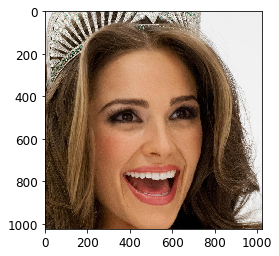

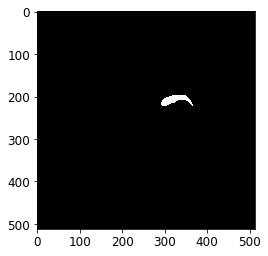

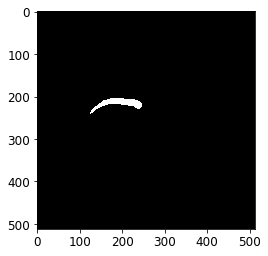

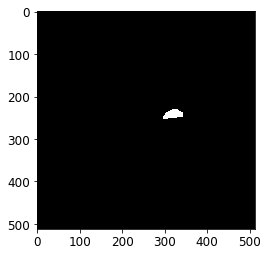

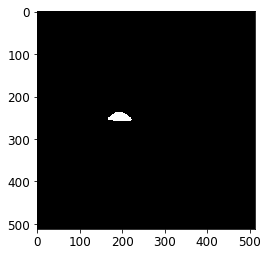

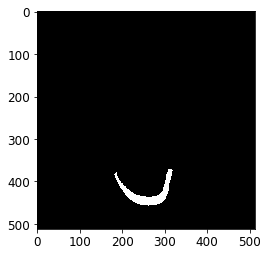

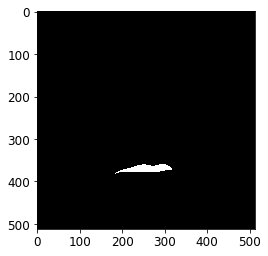

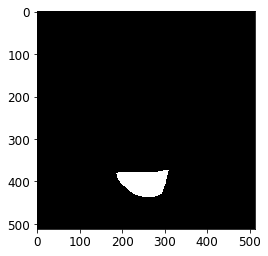

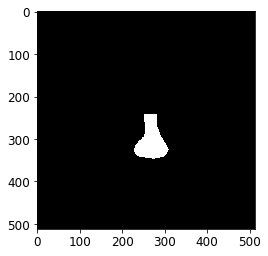

image 1:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
sizes_centers:
{'l_brow': {'h': 25.0, 'w': 89.0, 'x': 327.0, 'y': 211.0}, 'r_brow': {'h': 35.0, 'w': 78.0, 'x': 185.0, 'y': 211.0}, 'l_eye': {'h': 16.0, 'w': 50.0, 'x': 319.0, 'y': 246.0}, 'r_eye': {'h': 18.0, 'w': 46.0, 'x': 198.0, 'y': 244.0}, 'l_ear': {'h': 88.0, 'w': 31.0, 'x': 408.0, 'y': 263.0}, 'r_ear': {'h': 87.0, 'w': 37.0, 'x': 126.0, 'y': 261.0}, 'l_lip': {'h': 37.0, 'w': 107.0, 'x': 255.0, 'y': 388.0}, 'u_lip': {'h': 15.0, 'w': 107.0, 'x': 255.0, 'y': 368.0}, 'mouth': {'h': 18.0, 'w': 85.0, 'x': 256.0, 'y': 381.0}, 'nose': {'h': 107.0, 'w': 73.0, 'x': 253.0, 'y': 287.0}}
image shape:
(1024, 1024, 3)


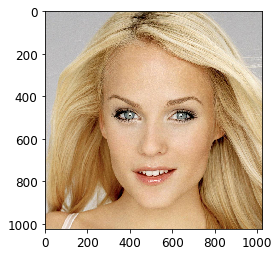

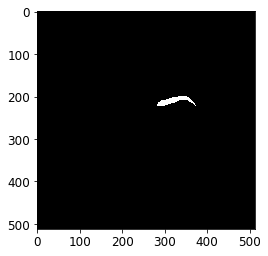

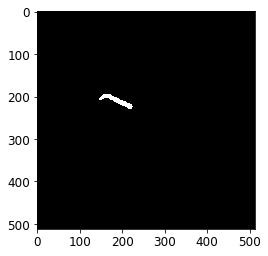

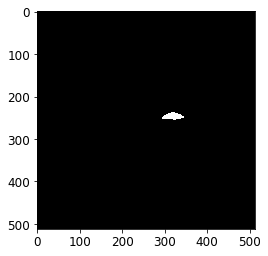

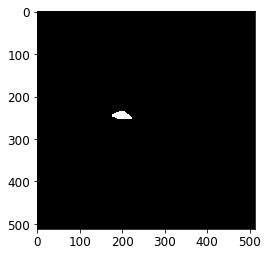

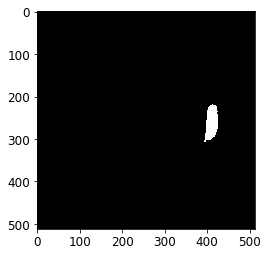

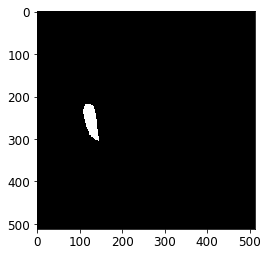

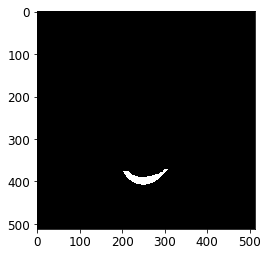

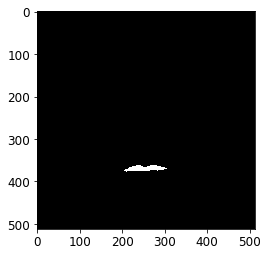

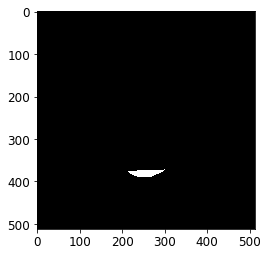

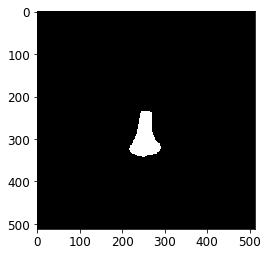

image 2:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 1, 0, 1, 1, 0, 1]])
sizes_centers:
{'l_brow': {'h': 27.0, 'w': 124.0, 'x': 321.0, 'y': 208.0}, 'r_brow': {'h': 19.0, 'w': 48.0, 'x': 186.0, 'y': 209.0}, 'l_eye': {'h': 17.0, 'w': 52.0, 'x': 318.0, 'y': 244.0}, 'r_eye': {'h': 19.0, 'w': 38.0, 'x': 199.0, 'y': 242.0}, 'l_ear': {'h': 108.0, 'w': 49.0, 'x': 479.0, 'y': 294.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 39.0, 'w': 107.0, 'x': 260.0, 'y': 403.0}, 'u_lip': {'h': 17.0, 'w': 106.0, 'x': 261.0, 'y': 388.0}, 'mouth': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'nose': {'h': 123.0, 'w': 81.0, 'x': 235.0, 'y': 294.0}}
image shape:
(1024, 1024, 3)


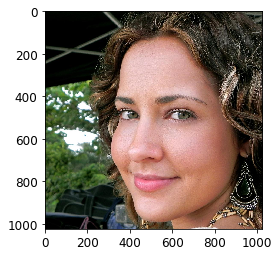

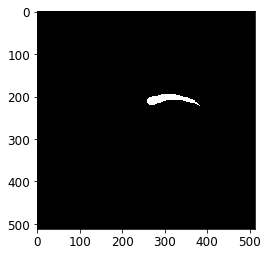

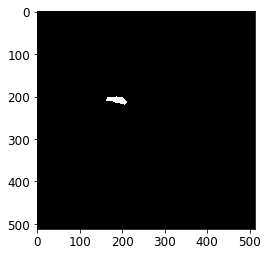

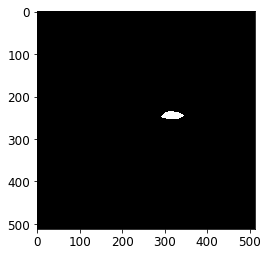

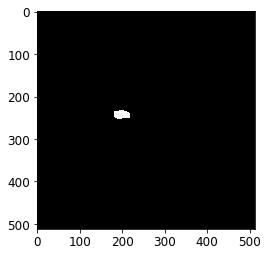

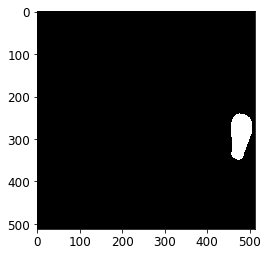

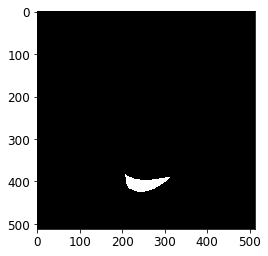

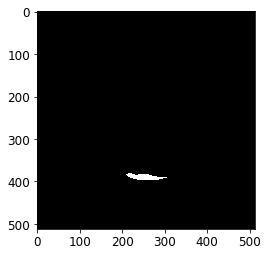

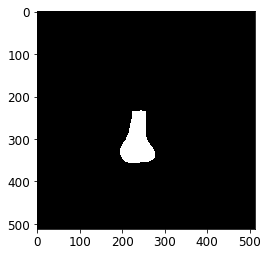

image 3:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 0, 0, 1, 1, 1, 1]])
sizes_centers:
{'l_brow': {'h': 25.0, 'w': 76.0, 'x': 332.0, 'y': 213.0}, 'r_brow': {'h': 26.0, 'w': 105.0, 'x': 190.0, 'y': 215.0}, 'l_eye': {'h': 21.0, 'w': 47.0, 'x': 321.0, 'y': 243.0}, 'r_eye': {'h': 17.0, 'w': 54.0, 'x': 197.0, 'y': 242.0}, 'l_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 45.0, 'w': 150.0, 'x': 255.0, 'y': 395.0}, 'u_lip': {'h': 17.0, 'w': 150.0, 'x': 255.0, 'y': 367.0}, 'mouth': {'h': 34.0, 'w': 135.0, 'x': 254.0, 'y': 386.0}, 'nose': {'h': 107.0, 'w': 90.0, 'x': 272.0, 'y': 290.0}}
image shape:
(1024, 1024, 3)


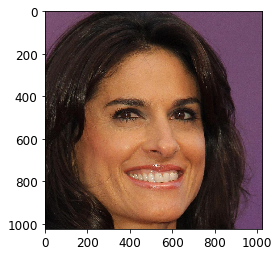

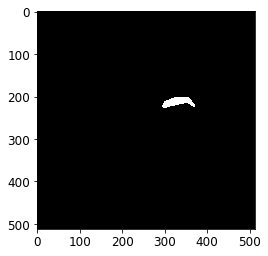

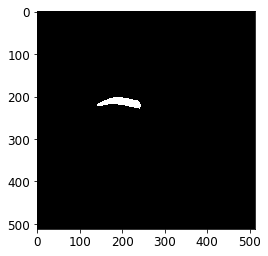

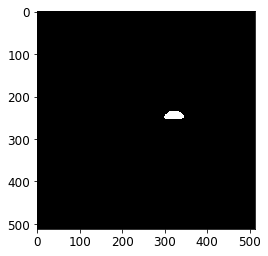

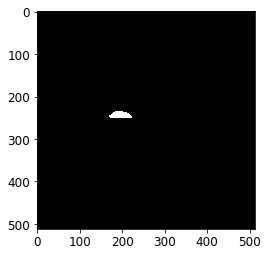

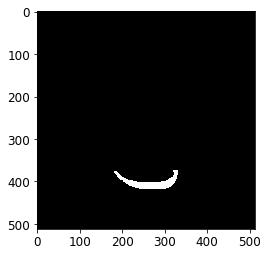

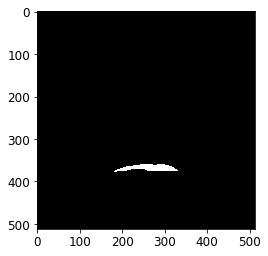

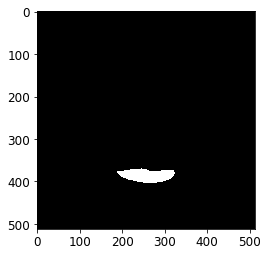

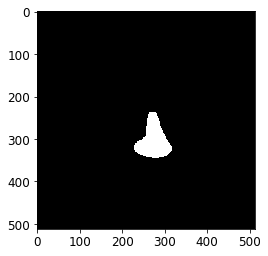

image 4:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]])
sizes_centers:
{'l_brow': {'h': 28.0, 'w': 87.0, 'x': 328.0, 'y': 215.0}, 'r_brow': {'h': 30.0, 'w': 80.0, 'x': 182.0, 'y': 222.0}, 'l_eye': {'h': 23.0, 'w': 53.0, 'x': 317.0, 'y': 245.0}, 'r_eye': {'h': 20.0, 'w': 49.0, 'x': 195.0, 'y': 247.0}, 'l_ear': {'h': 73.0, 'w': 23.0, 'x': 387.0, 'y': 258.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 32.0, 'w': 102.0, 'x': 255.0, 'y': 384.0}, 'u_lip': {'h': 15.0, 'w': 102.0, 'x': 255.0, 'y': 363.0}, 'mouth': {'h': 11.0, 'w': 70.0, 'x': 256.0, 'y': 372.0}, 'nose': {'h': 91.0, 'w': 71.0, 'x': 254.0, 'y': 290.0}}
image shape:
(1024, 1024, 3)


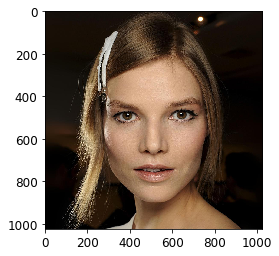

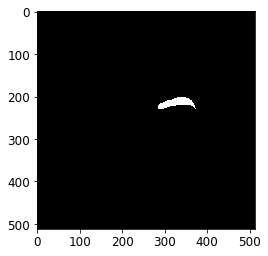

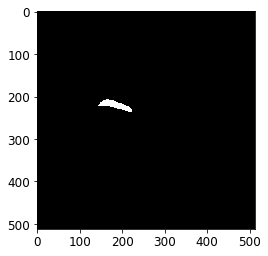

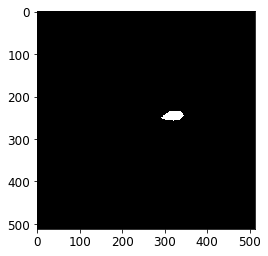

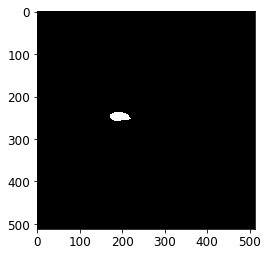

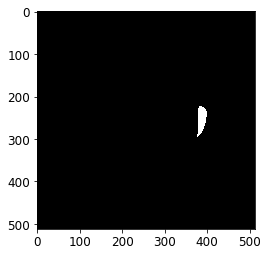

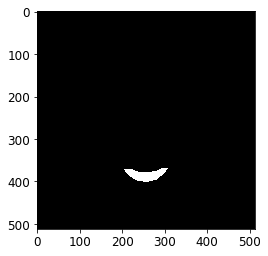

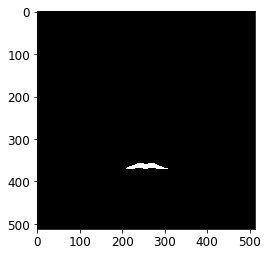

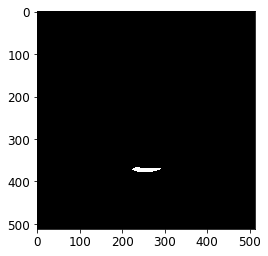

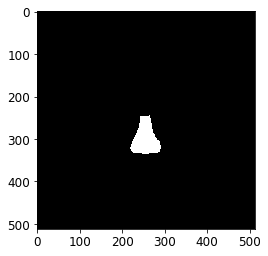

image 5:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 0, 0, 1, 1, 0, 1]])
sizes_centers:
{'l_brow': {'h': 26.0, 'w': 86.0, 'x': 329.0, 'y': 220.0}, 'r_brow': {'h': 22.0, 'w': 83.0, 'x': 193.0, 'y': 220.0}, 'l_eye': {'h': 18.0, 'w': 46.0, 'x': 323.0, 'y': 245.0}, 'r_eye': {'h': 21.0, 'w': 49.0, 'x': 195.0, 'y': 245.0}, 'l_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 24.0, 'w': 87.0, 'x': 257.0, 'y': 381.0}, 'u_lip': {'h': 14.0, 'w': 87.0, 'x': 257.0, 'y': 365.0}, 'mouth': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'nose': {'h': 91.0, 'w': 60.0, 'x': 262.0, 'y': 291.0}}
image shape:
(1024, 1024, 3)


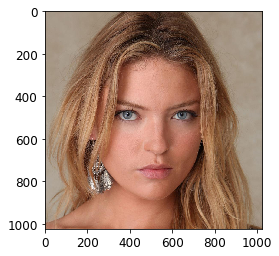

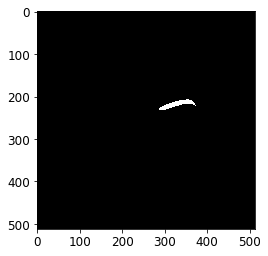

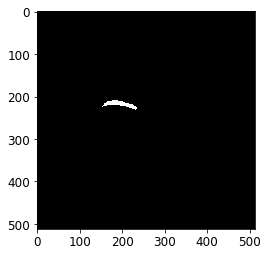

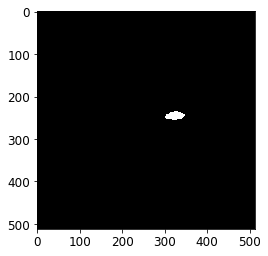

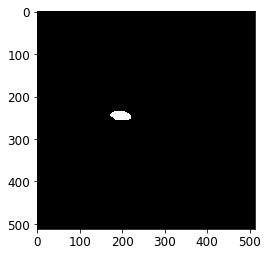

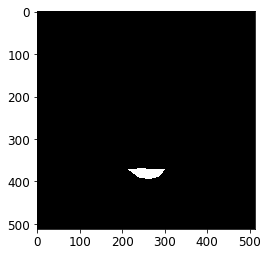

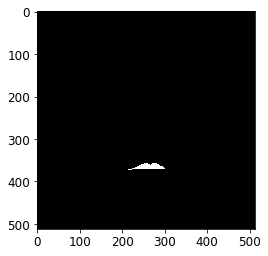

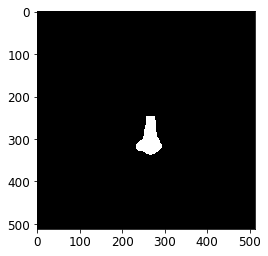

image 6:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 0, 0, 1, 1, 0, 1]])
sizes_centers:
{'l_brow': {'h': 36.0, 'w': 118.0, 'x': 319.0, 'y': 205.0}, 'r_brow': {'h': 25.0, 'w': 74.0, 'x': 186.0, 'y': 213.0}, 'l_eye': {'h': 14.0, 'w': 51.0, 'x': 321.0, 'y': 241.0}, 'r_eye': {'h': 12.0, 'w': 31.0, 'x': 194.0, 'y': 246.0}, 'l_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 19.0, 'w': 97.0, 'x': 248.0, 'y': 379.0}, 'u_lip': {'h': 21.0, 'w': 97.0, 'x': 248.0, 'y': 366.0}, 'mouth': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'nose': {'h': 98.0, 'w': 75.0, 'x': 243.0, 'y': 285.0}}
image shape:
(1024, 1024, 3)


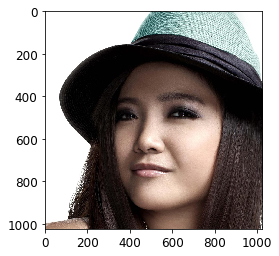

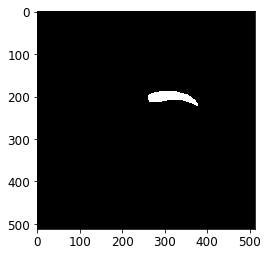

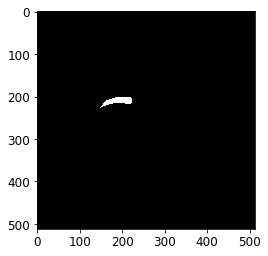

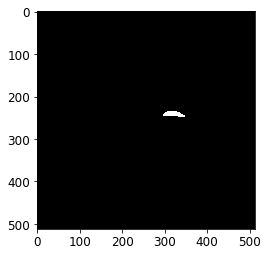

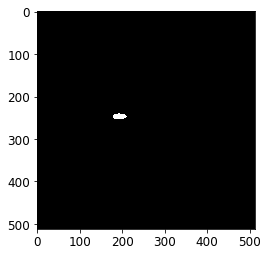

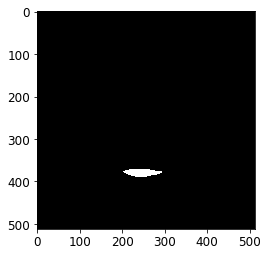

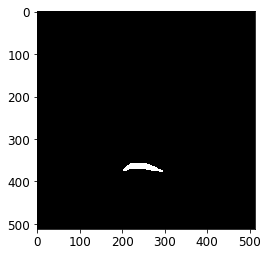

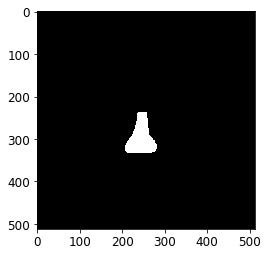

image 7:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]])
sizes_centers:
{'l_brow': {'h': 34.0, 'w': 87.0, 'x': 322.0, 'y': 221.0}, 'r_brow': {'h': 29.0, 'w': 94.0, 'x': 188.0, 'y': 219.0}, 'l_eye': {'h': 18.0, 'w': 45.0, 'x': 318.0, 'y': 245.0}, 'r_eye': {'h': 17.0, 'w': 49.0, 'x': 193.0, 'y': 245.0}, 'l_ear': {'h': 117.0, 'w': 44.0, 'x': 392.0, 'y': 260.0}, 'r_ear': {'h': 119.0, 'w': 56.0, 'x': 111.0, 'y': 262.0}, 'l_lip': {'h': 22.0, 'w': 92.0, 'x': 254.0, 'y': 377.0}, 'u_lip': {'h': 17.0, 'w': 93.0, 'x': 254.0, 'y': 361.0}, 'mouth': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'nose': {'h': 92.0, 'w': 68.0, 'x': 258.0, 'y': 293.0}}
image shape:
(1024, 1024, 3)


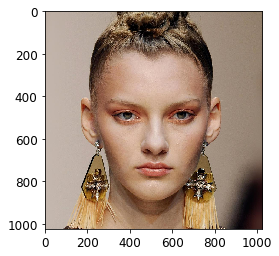

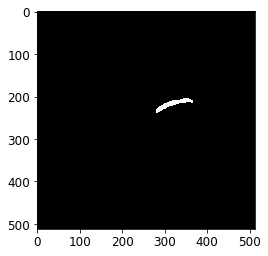

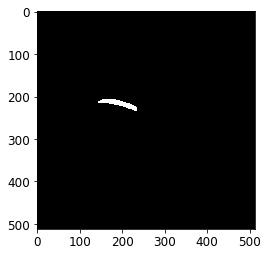

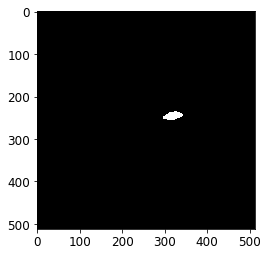

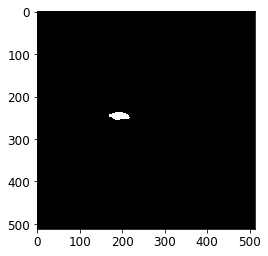

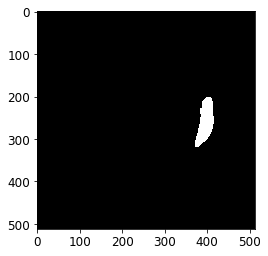

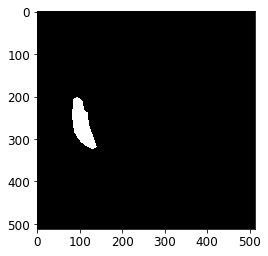

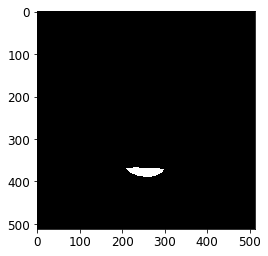

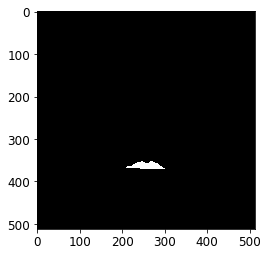

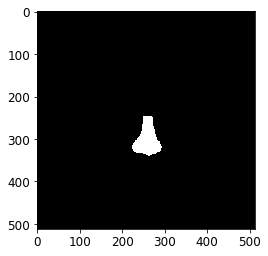

image 8:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 1, 0, 1, 1, 0, 1]])
sizes_centers:
{'l_brow': {'h': 30.0, 'w': 88.0, 'x': 322.0, 'y': 217.0}, 'r_brow': {'h': 24.0, 'w': 82.0, 'x': 193.0, 'y': 221.0}, 'l_eye': {'h': 19.0, 'w': 58.0, 'x': 315.0, 'y': 241.0}, 'r_eye': {'h': 20.0, 'w': 56.0, 'x': 194.0, 'y': 243.0}, 'l_ear': {'h': 95.0, 'w': 42.0, 'x': 397.0, 'y': 285.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 24.0, 'w': 90.0, 'x': 255.0, 'y': 378.0}, 'u_lip': {'h': 21.0, 'w': 90.0, 'x': 255.0, 'y': 360.0}, 'mouth': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'nose': {'h': 89.0, 'w': 61.0, 'x': 255.0, 'y': 289.0}}
image shape:
(1024, 1024, 3)


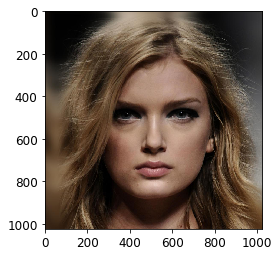

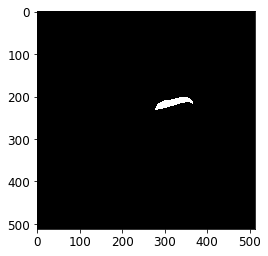

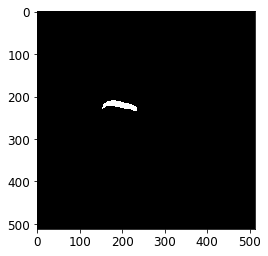

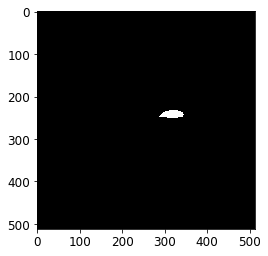

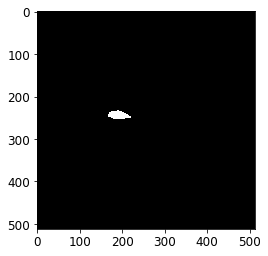

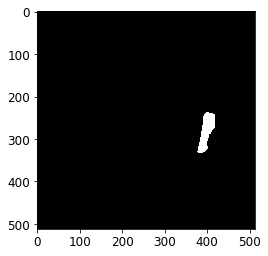

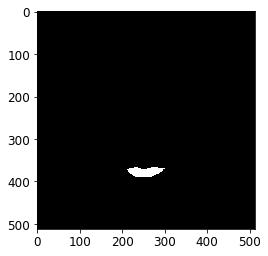

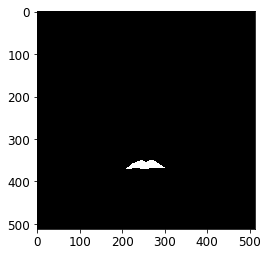

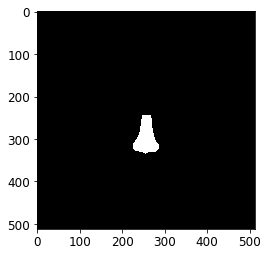

image 9:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]])
sizes_centers:
{'l_brow': {'h': 23.0, 'w': 63.0, 'x': 331.0, 'y': 204.0}, 'r_brow': {'h': 23.0, 'w': 125.0, 'x': 183.0, 'y': 213.0}, 'l_eye': {'h': 25.0, 'w': 47.0, 'x': 317.0, 'y': 245.0}, 'r_eye': {'h': 22.0, 'w': 58.0, 'x': 191.0, 'y': 245.0}, 'l_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'r_ear': {'h': 122.0, 'w': 67.0, 'x': 33.0, 'y': 266.0}, 'l_lip': {'h': 40.0, 'w': 110.0, 'x': 255.0, 'y': 400.0}, 'u_lip': {'h': 14.0, 'w': 110.0, 'x': 255.0, 'y': 378.0}, 'mouth': {'h': 20.0, 'w': 100.0, 'x': 254.0, 'y': 391.0}, 'nose': {'h': 101.0, 'w': 76.0, 'x': 270.0, 'y': 294.0}}
image shape:
(1024, 1024, 3)


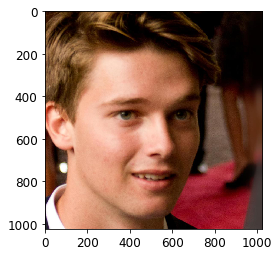

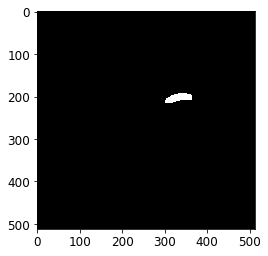

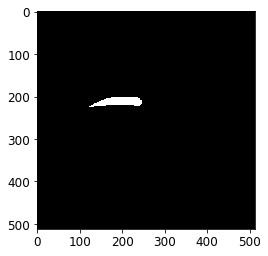

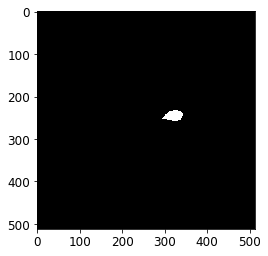

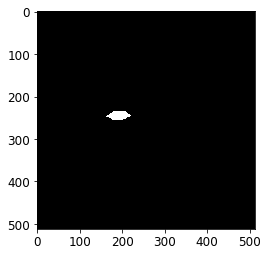

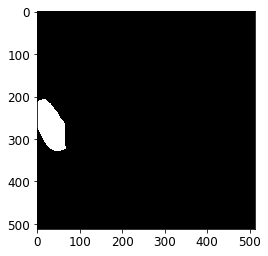

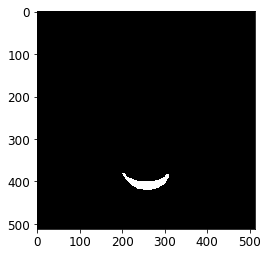

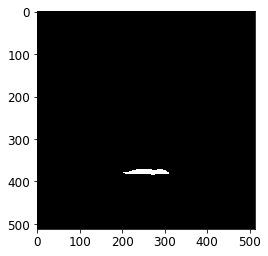

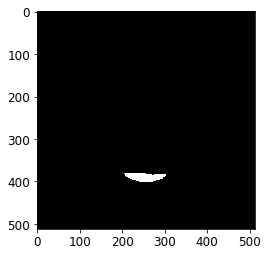

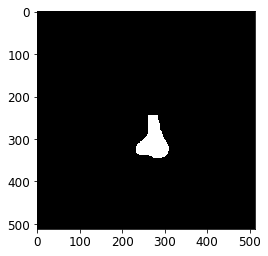

image 10:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 0, 1, 1, 1, 0, 1]])
sizes_centers:
{'l_brow': {'h': 40.0, 'w': 72.0, 'x': 333.0, 'y': 204.0}, 'r_brow': {'h': 40.0, 'w': 101.0, 'x': 185.0, 'y': 195.0}, 'l_eye': {'h': 19.0, 'w': 53.0, 'x': 321.0, 'y': 246.0}, 'r_eye': {'h': 20.0, 'w': 52.0, 'x': 193.0, 'y': 244.0}, 'l_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'r_ear': {'h': 101.0, 'w': 42.0, 'x': 83.0, 'y': 272.0}, 'l_lip': {'h': 26.0, 'w': 111.0, 'x': 260.0, 'y': 376.0}, 'u_lip': {'h': 15.0, 'w': 111.0, 'x': 260.0, 'y': 361.0}, 'mouth': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'nose': {'h': 82.0, 'w': 89.0, 'x': 264.0, 'y': 282.0}}
image shape:
(1024, 1024, 3)


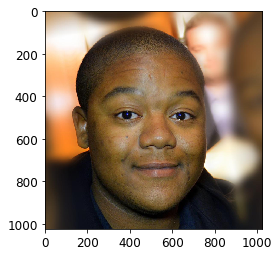

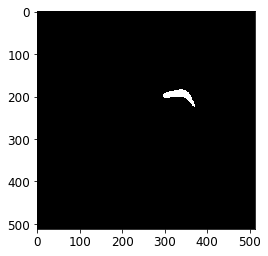

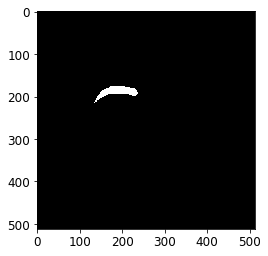

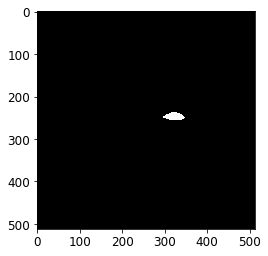

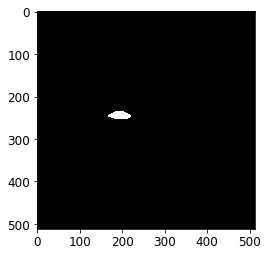

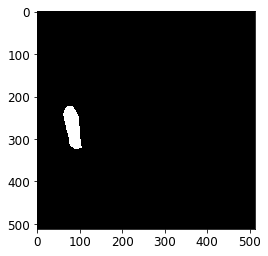

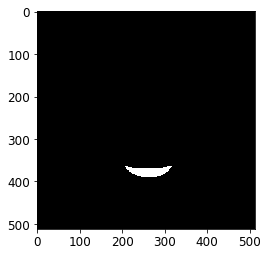

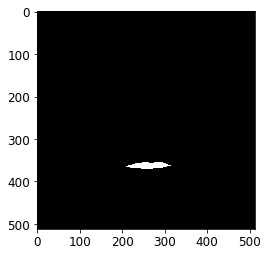

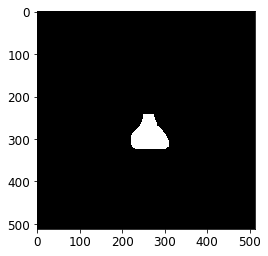

In [53]:
from hw3.data_loader import CelebA, print_image_details

#server path
#face_indicator_dataset = CelebA(r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img", r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img/annotation_indicators.csv", None)
#windows path
dataset = CelebA('./imgs/CelebAMask-HQ/CelebA-HQ-img', 
                 './imgs/CelebAMask-HQ/CelebA-HQ-img/annotation_indicators.csv',
                 './imgs/CelebAMask-HQ/CelebAMask-HQ-mask-anno/CelebAMask-HQ-mask-anno-complete',
                 './imgs/CelebAMask-HQ/CelebAMask-HQ-mask-anno/CelebAMask-HQ-mask-anno-complete/sized_and_centers.csv', None)

for i in range(len(dataset)):
    print_image_details(i, dataset)

    if(i == 10):
        break

In [8]:
from hw3.Indicators import Indicators, indicator_loss
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
from hw3.training import IndicatorTrainer
from hw3.data_loader import ToTensor

# Data
#server path
#ds = CelebAIndicator(r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img", r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img/annotation_indicators.csv", ToTensor())
#windows path
ds = CelebAIndicator(r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebA-HQ-img", r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebA-HQ-img\annotation_indicators.csv", ToTensor())
#server size
#ds_train, ds_test = random_split(ds, [25000, 5000])
#windows size
ds_train, ds_test = random_split(ds, [75, 26])

dl_train = DataLoader(ds_train, 125, shuffle=True, num_workers=2)
dl_test  = DataLoader(ds_test,  125, shuffle=True, num_workers=2)

# Model
ind_model = Indicators(3, 10)

# Optimizer
optimizer = optim.Adam(ind_model.parameters(), lr=0.01)

#Trainer
trainer = IndicatorTrainer(ind_model, indicator_loss, optimizer, 'cpu')

# Show model and hypers
print(ind_model)

Indicators(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1024144, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
    (5): Sigmoid()
  )
)


In [32]:
def get_center_points(heat_map):
    flatten_heat_map = heat_map.view(heat_map.shape[0], 10, -1)
    center_points = torch.argmax(flatten_heat_map, dim=2)
    # We start from top left of the image - right is x-axis down is y-axis
    y = center_points / heat_map.shape[2]
    x = center_points % heat_map.shape[2]

    center_points = []
    for item1, item2 in zip(x, y):
        pic_center_points = []
        for i1, i2 in zip(item1, item2):
            pic_center_points.append((i1.item(), i2.item()))
        center_points.append(pic_center_points)
    return center_points
# NxCxHxW
vector = torch.rand((2, 10, 4, 4))
print(f"vector:{vector[0]}")
#flatten_vector = vector.view(2, 3, -1)
#print(f"flatten_vector:{flatten_vector}")
#center_points = flatten_vector.argmax(2)
#print(f"center_points:{center_points}")
#rows = center_points / 4
#print(f"rows:{rows}")
#cols = center_points % 4
#print(f"cols:{cols}")

#center_points = []
#for item1, item2 in zip(cols, rows):
#    pic_center_points = []
#    for i1, i2 in zip(item1, item2):
#        pic_center_points.append((i1.item(), i2.item()))
#    center_points.append(pic_center_points)
#print(f"center_points:{center_points}")
print(get_center_points(vector))   

vector:tensor([[[0.1726, 0.9127, 0.2299, 0.9526],
         [0.6126, 0.8725, 0.7771, 0.2788],
         [0.9449, 0.5833, 0.9112, 0.9711],
         [0.4802, 0.8635, 0.3370, 0.6750]],

        [[0.5504, 0.5993, 0.8261, 0.9984],
         [0.7833, 0.5920, 0.7340, 0.3463],
         [0.0668, 0.5651, 0.0323, 0.4946],
         [0.2447, 0.9857, 0.2649, 0.9929]],

        [[0.3514, 0.5056, 0.1233, 0.8366],
         [0.0410, 0.8038, 0.0439, 0.2986],
         [0.5045, 0.1878, 0.9589, 0.2015],
         [0.1690, 0.3008, 0.2904, 0.0297]],

        [[0.4472, 0.2755, 0.6696, 0.8104],
         [0.2089, 0.4482, 0.4745, 0.1561],
         [0.6820, 0.9546, 0.0821, 0.1440],
         [0.1300, 0.7220, 0.6341, 0.9697]],

        [[0.7948, 0.4814, 0.6541, 0.4779],
         [0.6241, 0.4268, 0.2019, 0.1288],
         [0.1509, 0.3921, 0.1118, 0.7187],
         [0.1719, 0.4103, 0.2515, 0.4936]],

        [[0.2606, 0.1521, 0.9891, 0.9365],
         [0.9805, 0.4229, 0.4192, 0.7053],
         [0.9222, 0.5111, 0.1840, 0.9

In [51]:
vector = torch.rand((2, 10, 4, 4))
center_points = get_center_points(vector)
shape = torch.rand(2, 3*3, 4, 4)
size = abs(torch.tensor((torch.rand(2, 2, 4, 4)*3)+1, dtype=torch.int))

def extractLocalMasks(center_points, shape, size):
    """
    center_points = list of list of tuples - (x, y) - Nx10
    shape - Nx(32*32)xHxW
    size - Nx2xHxW
    """
    organs = ["l_brow", "r_brow", "l_eye", "r_eye", "l_ear", "r_ear", "l_lip", "u_lip", "mouth", "nose"]
    to_pil = T.ToPILImage()
    to_tensor = T.ToTensor()

    local_masks = []
    for pic_center_points, pic_shape, pic_size in zip(center_points, shape, size):
        pic_local_masks = dict()
        for point, organ in zip(pic_center_points, organs):
            shape_vec = pic_shape[:, point[1], point[0]]
            shape_vec = shape_vec.reshape(3, 3)
            
            #print(f"h:{pic_size[0, point[1], point[0]]}")
            #print(f"w:{pic_size[1, point[1], point[0]]}")
            resize_temp = T.Resize((pic_size[0, point[1], point[0]], pic_size[1, point[1], point[0]]))
            mask = to_tensor(resize_temp(to_pil(shape_vec)))
            pic_local_masks.update({'center_point_'+organ: point, 'mask_'+organ: mask})
        local_masks.append(pic_local_masks)
    return local_masks

print(f"center_points:{center_points}")
print(f"shape:{shape}")
print(f"size:{size}")
print(f"local masks:{extractLocalMasks(center_points, shape, size)}")

center_points:[[(0, 0), (2, 2), (1, 1), (1, 3), (2, 3), (3, 1), (1, 2), (2, 0), (2, 2), (0, 0)], [(0, 2), (3, 3), (2, 1), (2, 3), (3, 0), (2, 0), (1, 2), (1, 3), (1, 0), (3, 1)]]
shape:tensor([[[[0.5576, 0.6345, 0.0152, 0.8185],
          [0.8736, 0.0559, 0.8154, 0.4884],
          [0.5490, 0.6609, 0.4923, 0.6843],
          [0.7621, 0.0198, 0.5808, 0.8615]],

         [[0.6027, 0.3294, 0.9482, 0.5279],
          [0.0646, 0.8663, 0.8431, 0.9744],
          [0.9547, 0.4407, 0.6552, 0.3179],
          [0.2613, 0.9643, 0.9478, 0.6117]],

         [[0.2026, 0.4407, 0.3795, 0.4704],
          [0.8037, 0.8312, 0.3008, 0.2832],
          [0.4088, 0.5845, 0.0079, 0.6811],
          [0.8465, 0.1133, 0.5871, 0.2958]],

         [[0.1033, 0.1486, 0.9464, 0.7218],
          [0.5726, 0.7403, 0.6609, 0.9103],
          [0.8963, 0.0686, 0.9849, 0.2638],
          [0.8411, 0.7493, 0.9330, 0.3994]],

         [[0.0549, 0.2969, 0.5285, 0.1838],
          [0.4605, 0.3047, 0.4730, 0.6558],
          [0.07

C:\Users\Gchiko\miniconda3\envs\cs236781-hw\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [26]:
import IPython.display

def post_epoch_fn(epoch, train_result, test_result, verbose):
    print(f"epoch num:{epoch}/ntrain result:{train_result}/ntest_result:{test_result}/n")
        
res = trainer.fit(dl_train, dl_test,
                      num_epochs=100, checkpoints='checkpoint_file', early_stopping=15, print_every=10)

--- EPOCH 1/100 ---
train_batch:   0%|                                                                               | 0/1 [00:14<?, ?it/s]


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 23409000000 bytes. Buy new RAM!


second part - CenterFace

torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
total:tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1.,

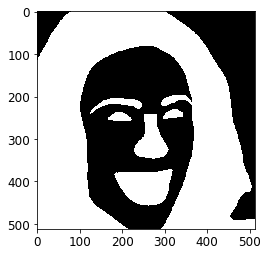

In [27]:
import glob 
from PIL import Image

images=glob.glob(r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebAMask-HQ-mask-anno\*png")

trans1 = T.ToTensor()
trans2 = T.ToPILImage()

i = 0
for image in images:
    img = Image.open(image)
    print(trans1(img).shape)
    plt.imshow(trans2(trans1(img)))
    if i == 0:
        total_image = torch.zeros_like(trans1(img))
    total_image = torch.max(total_image, trans1(img))
    if i==8:
        print(f"total:{total_image}")
        plt.imshow(trans2(total_image))
        break
    i += 1

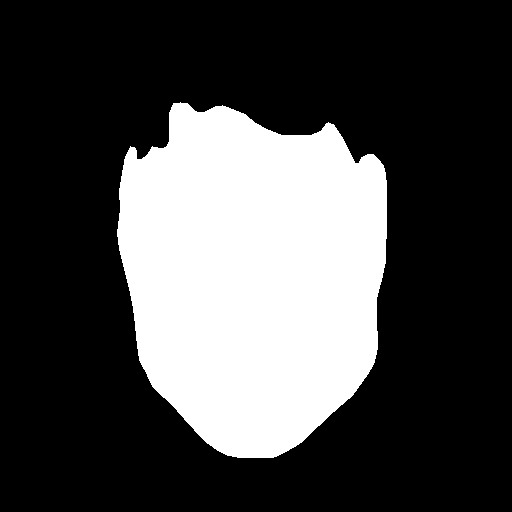

In [26]:
Image.open(r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebAMask-HQ-mask-anno\00016_skin.png")